In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lasio
from scipy import signal

def plot_curve(ax, df, curve, lb=None, ub=None, color='k', pad=0, s=2, mult=1,
            units:str=None, mask=None, offset:int=0, title:str=None, label:str=None,
            semilog:bool=False, bar:bool=False, fill:bool=None, rightfill:bool=False,
            marker=None, edgecolor=None, ls=None, alpha=None):
        if mask is None:
            x, y = -offset+mult*df[curve], df.index
        else:
            x, y = -offset+mult*df[curve][mask], df.index[mask]
        lb = x[~np.isnan(x)].min() if lb is None else lb
        ub = x[~np.isnan(x)].max() if ub is None else ub
        if semilog:
            ax.semilogx(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linestyle=ls, linewidth=s)
        else:
            if bar:
                ax.barh(y, x, color=color, label=curve, alpha=alpha)
            else:
                ax.plot(x, y, c=color, label=curve, alpha=alpha,
                        marker=marker, markersize=s, markeredgecolor=edgecolor, linewidth=s, linestyle=ls)
        if fill:
            if rightfill:
                ax.fill_betweenx(y, x, ub, alpha=alpha, color=color)
            else:
                ax.fill_betweenx(y, lb, x, alpha=alpha, color=color)
        if units is None:
            if hasattr(df, 'curvesdict'):
                units = df.curvesdict[curve].unit
            else:
                units = ''
        ax.set_xlim(lb, ub)
        ax.grid(True, which='both')
        ax.set_title(title, weight='bold') if title != None else None
        xlab = label if label is not None else curve
        if offset != 0:
            ax.set_xlabel('{} [{}] with {} offset'.format(xlab, units, offset), color=color, weight='bold')
        else:
            ax.set_xlabel('{} [{}]'.format(xlab, units), color=color, weight='bold')
        ax.xaxis.set_label_position('top'); ax.xaxis.set_ticks_position('top')
        ax.xaxis.set_tick_params(color=color, width=s)
        ax.spines['top'].set_position(('axes', 1+pad/100))
        ax.spines['top'].set_edgecolor(color); ax.spines['top'].set_linewidth(2)
        if ls is not None:
            ax.spines['top'].set_linestyle(ls)
        return None

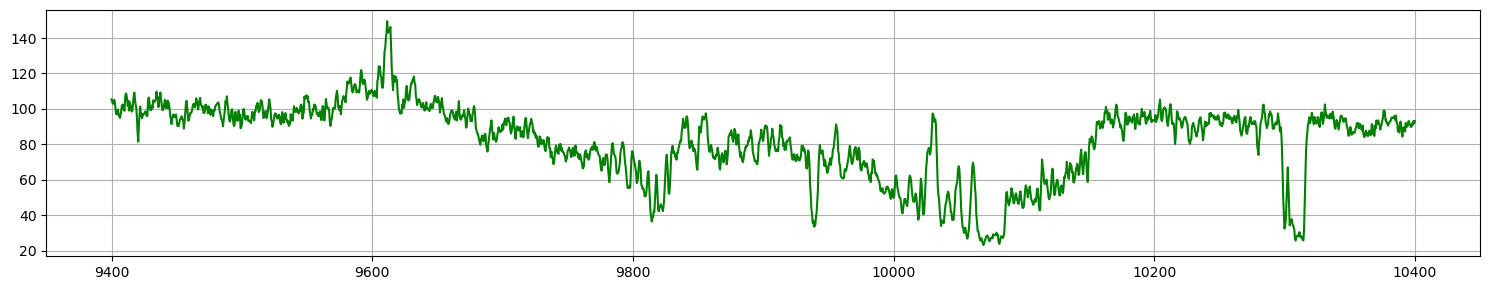

In [ ]:
# Chevron 2009 Egypt
well1 = lasio.read('data/chevron2009.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well1.index, well1.GR, c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

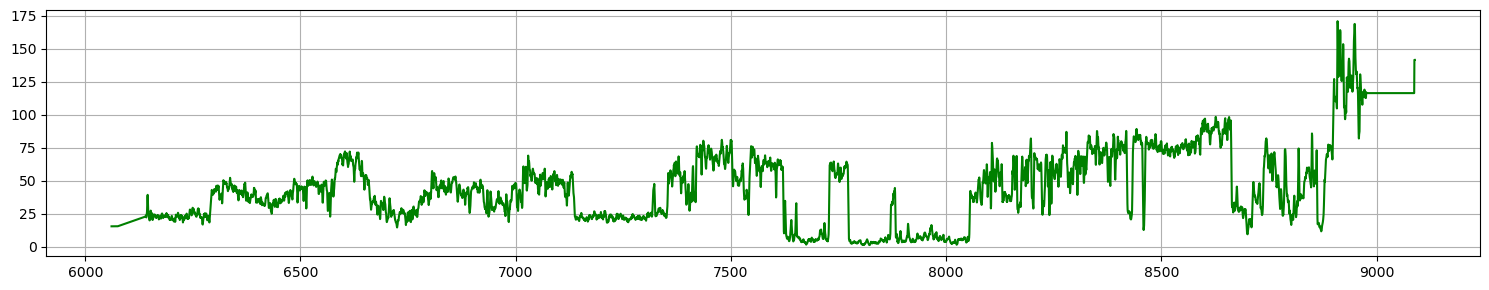

In [ ]:
# AkerBP North Sea
well2 = lasio.read('data/akerbp.las').df()

plt.figure(figsize=(15,3))
plt.plot(well2.index, well2.HCGR, c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

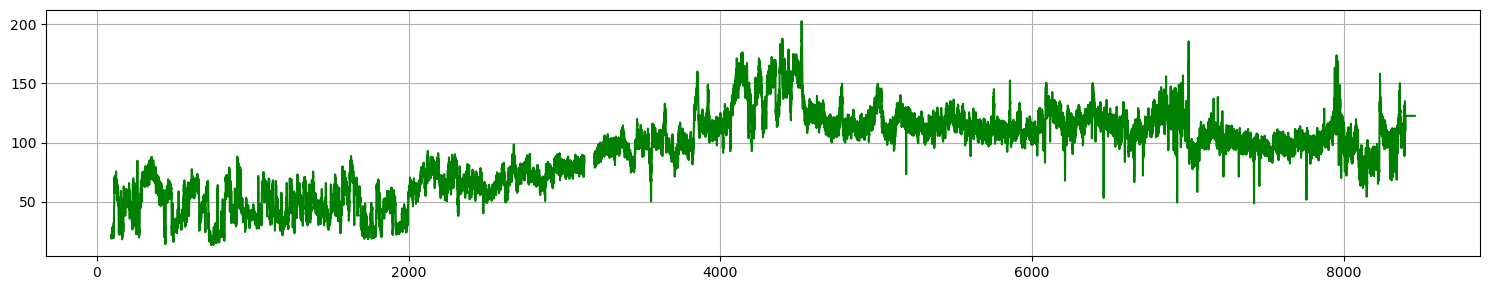

In [ ]:
# ConocoPhillips Alaska 1
well3 = lasio.read('data/3T-621_OH.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well3.index, well3.GR, c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

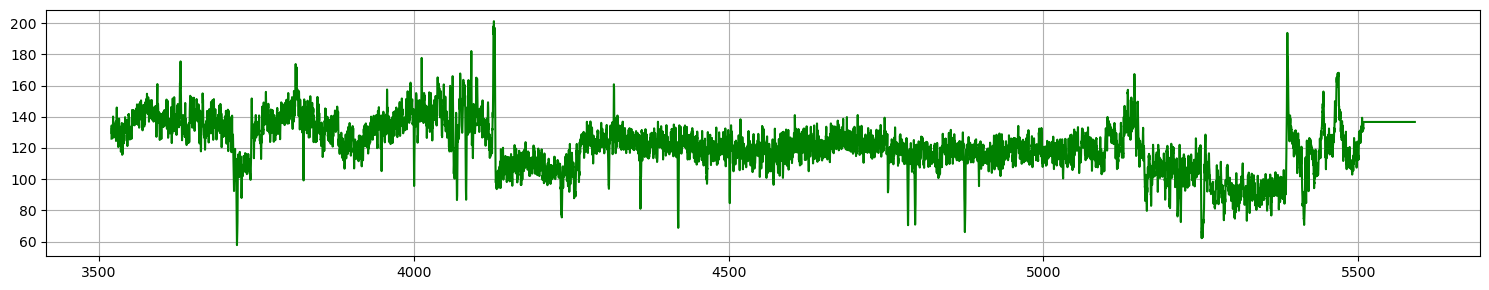

In [ ]:
# ConocoPhillips Alaska Moraine
well4 = lasio.read('data/MORAINE 1_OH_DATA.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well4.index, well4.GR_N, c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

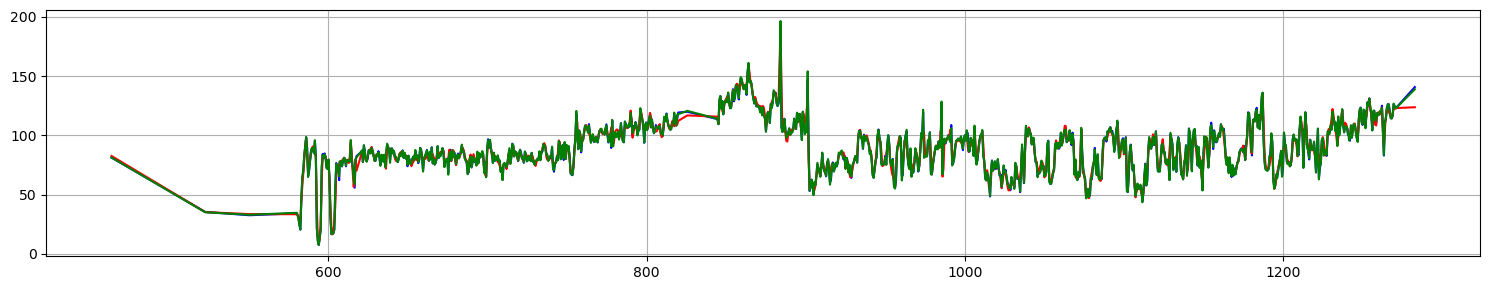

In [75]:
# Smeaheia 32 2-1
well5 = lasio.read('data/Smeaheia/data/32 2-1').df()

plt.figure(figsize=(15,3))
plt.plot(well5.index, well5['GR:1'], c='b')
plt.plot(well5.index, well5['GR:2'], c='r')
plt.plot(well5.index, well5['GR:3'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

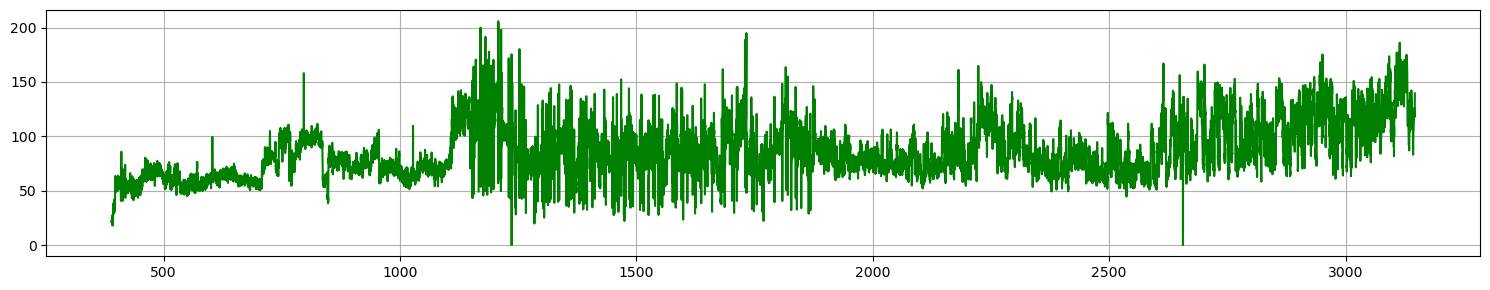

In [74]:
# Smeaheia 32 4-1
well6 = lasio.read('data/Smeaheia/data/32 4-1').df()

plt.figure(figsize=(15,3))
plt.plot(well6.index, well6['GR'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

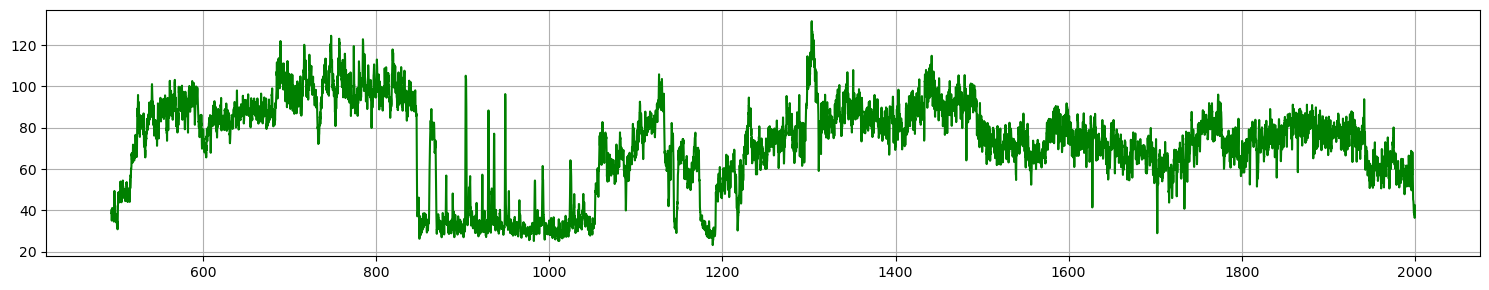

In [81]:
# Sleipner 15-9-13
well7 = lasio.read('data/Sleipner/data/Wells_released_2011/Well 159_13/159-13 Logs.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well7.index, well7['GR'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

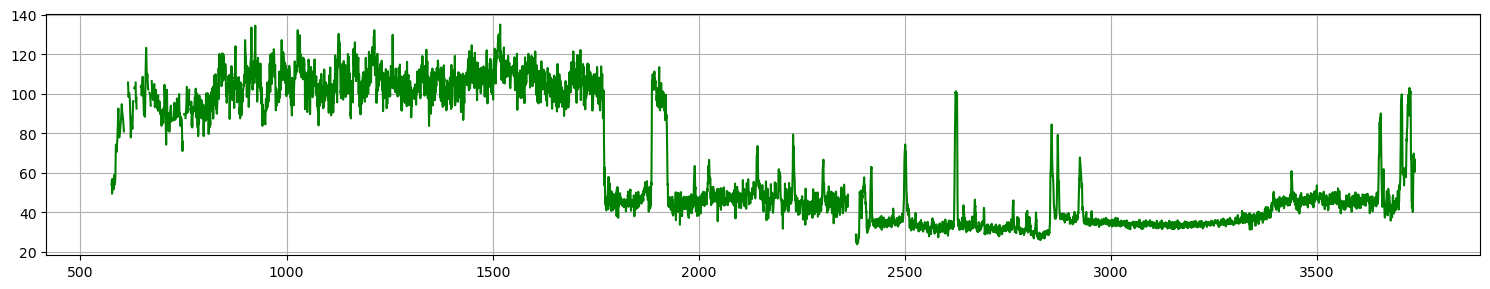

In [82]:
# Sleipner 15-9-A16
well8 = lasio.read('data/Sleipner/data/Wells_released_2011/Well 159_A16/159-A-16.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well8.index, well8['GR'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

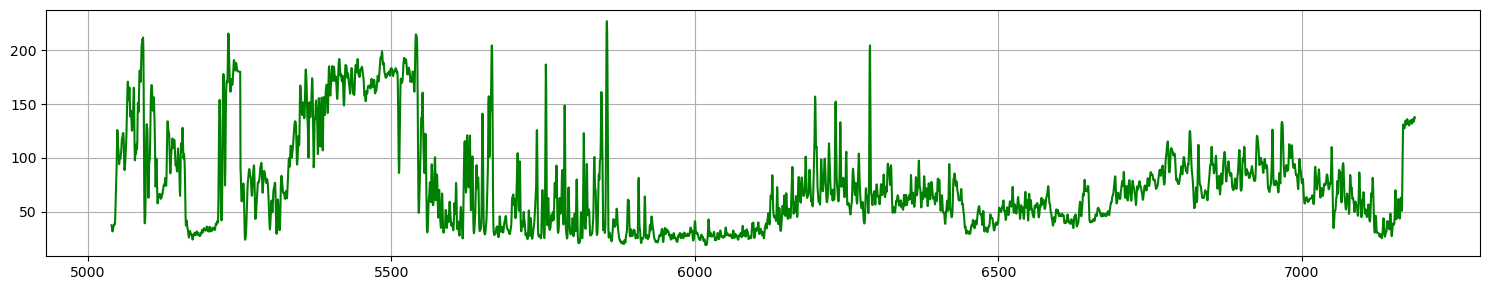

In [ ]:
# Decatur IBDP
well9 = lasio.read('data/Decatur/data/IBDP_Geophysical_Logs/1211523415_CCS1/Raw_Logs/1211523415_20200727_CCS1_Compiled_Raw_Logs_Petrel.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well9.index, well9['GAMMA'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

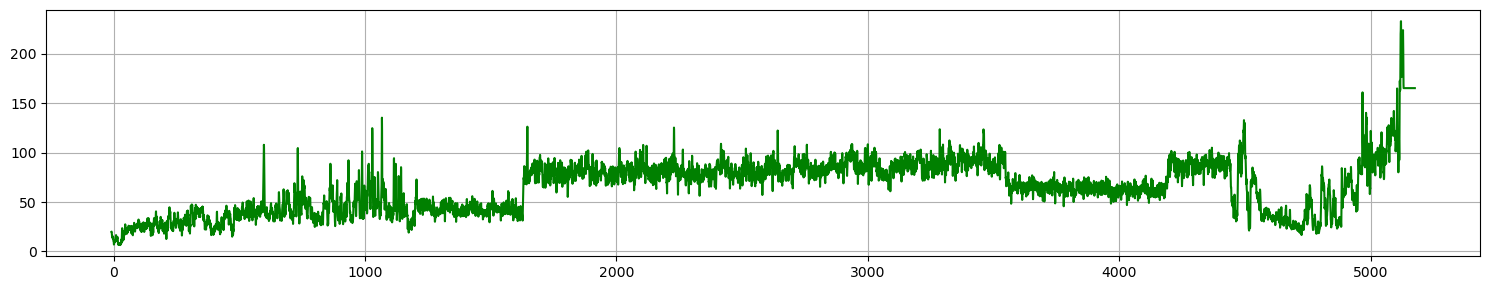

In [157]:
# Utah Forge 1
well10 = lasio.read('data/Utah Forge/Wireline Field Data/UnivUtah_Forge16A-78-32_R4_USI_MainPass.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well10.index, well10['GR_EDTC'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

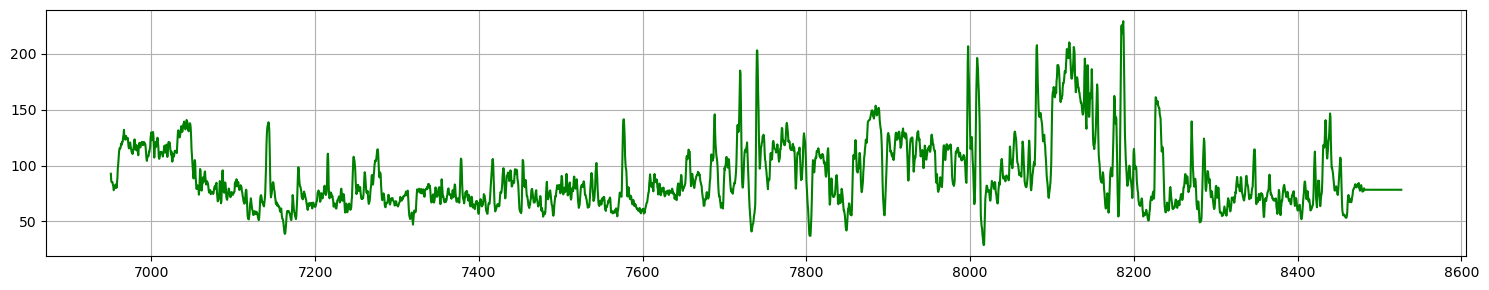

In [158]:
# Utah Forge 2
well11 = lasio.read('data/Utah Forge/Wireline Field Data/UnivUtah_Forge16A-78-32_R4_UBI_Main_8500-6950_Rev1.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well11.index, well11['GR_EDTC'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

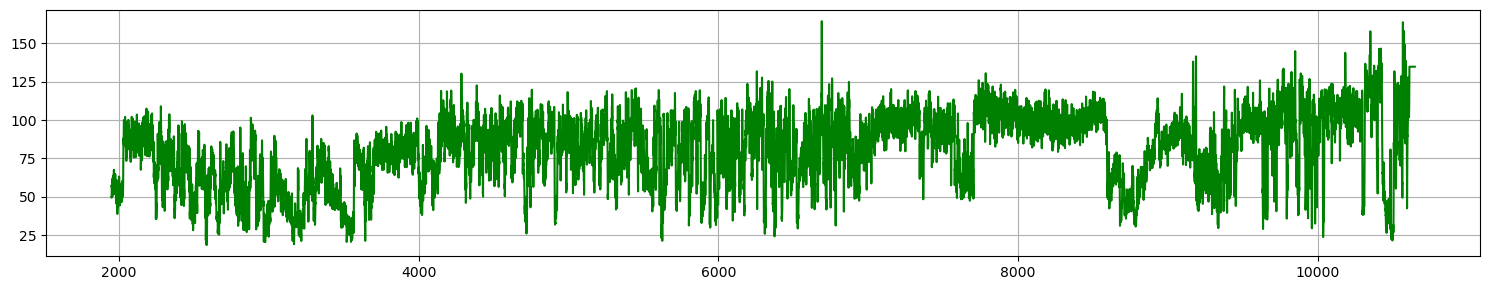

In [209]:
# Cranfield F1 (injector)
well12 = lasio.read('data/Cranfield/F1 Well Logs/las/06-06-09 APWH00103_DENBURY_CFU_31F_1_PEX_MLT_MAIN_009PUP-GenericV20.LAS').df()

plt.figure(figsize=(15,3))
plt.plot(well12.index, well12['GR'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

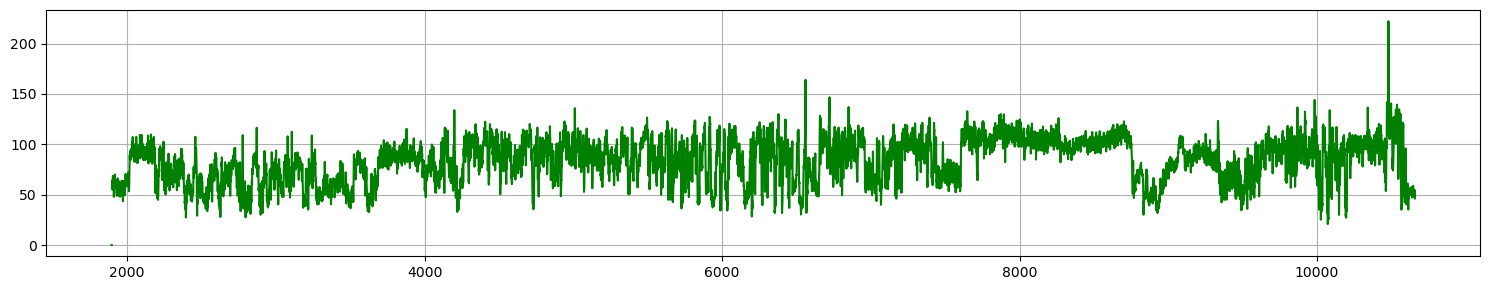

In [251]:
# Cranfield 48-1
well13 = lasio.read("data/Cranfield/other-wells/48-1.LAS").df()

plt.figure(figsize=(15,3))
plt.plot(well13.index, well13['GRGC'], c='g')
plt.grid(True, which='both')
plt.tight_layout()
plt.show()